In [2]:
###########################################

In [3]:
############ Import libraries

In [4]:
from bs4 import BeautifulSoup as bs 
import pandas as pd
import re
from selenium import webdriver 
#from selenium.webdriver.common.keys import Keys
import time

In [5]:
from fuzzywuzzy import fuzz
from fuzzywuzzy import process

In [43]:
#####################################################
################ utility function
def return_string(string, start_after_word,stop_before_word):
    """return part of string between 2 words \
    (string, start_after_word,stop_befor_word)"""
    try:
        if start_after_word=="":
            start_address=0
        else:
            start_address=re.search(start_after_word,string).span()[1]
        #print(start_address)
        if stop_before_word=="":
            stop_address=len(string)
        else:
            stop_address=re.search(stop_before_word,string).span()[0]
        #print(stop_address)
        my_string=string[start_address:stop_address]
    except Exception as e:
        # handle error
        error=f"_exception_: {type(e).__name__},</br> _arguments_: {e.args}"
        print(error)
        my_string=None
    return my_string

In [35]:
return_string('i love papa sdsds and mama sdsd .','mama','')

' sdsd .'

In [8]:
# URL  of page for scraping
url='https://heb.com'

In [9]:
driver = webdriver.Chrome('C://bin//chromedriver.exe')  
driver.get(url) 
time.sleep(5)

In [10]:
#clear button
try:
    py_button=driver.find_element_by_xpath("//button[@aria-label='Reset']")
    py_button.click()
except:
    print('no text yet')

no text yet


In [11]:
# click on search field
py_button = driver.find_element_by_xpath("//input[@name='q']")
py_button.click()

In [12]:
# search of Milk
search_item='milk'
py_button.send_keys(f'{search_item}')


In [13]:
# press search button ( wait 5 min)
py_button=driver.find_element_by_xpath("//button[@aria-label='Search']")
py_button.click()
time.sleep(5)

<html class="js flexbox flexboxlegacy canvas canvastext webgl no-touch geolocation postmessage websqldatabase indexeddb hashchange history draganddrop websockets rgba hsla multiplebgs backgroundsize borderimage borderradius boxshadow textshadow opacity cssanimations csscolumns cssgradients cssreflections csstransforms csstransforms3d csstransitions fontface generatedcontent video audio localstorage sessionstorage webworkers no-applicationcache svg inlinesvg smil svgclippaths" lang="en" style="" xml:lang="en" xmlns="http://www.w3.org/1999/xhtml"><head><meta class="foundation-mq-small"/><meta class="foundation-mq-small-only"/><meta class="foundation-mq-medium"/><meta class="foundation-mq-medium-only"/><meta class="foundation-mq-large"/><meta class="foundation-mq-large-only"/><meta class="foundation-mq-xlarge"/><meta class="foundation-mq-xlarge-only"/><meta class="foundation-mq-xxlarge"/><meta class="foundation-data-attribute-namespace"/>
<meta charset="utf-8"/>
<meta content="width=devic
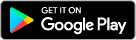
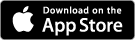

In [14]:

response = driver.page_source
soup=bs(response,'lxml')
soup

In [15]:
result=soup.body.find_all('a',id=re.compile('product-'))
result[3]

<a aria-label="H-E-B Select Ingredients Fat Free Milk,
		1/2 gal,
		$1.94 each. Features:  CARB AWARE.  LOW SATURATED FAT.  GO LOCAL.  SELECT INGREDIENTS." class="responsivegriditem__aria-link-wrap" href="/product-detail/h-e-b-select-ingredients-fat-free-milk/314136" id="product-314136">
<div class="responsivegriditem-top" onclick="gtm_e_productClick('gtm-product-click-314136');">
<div class="cat-feature clearfix">
<div class="cat-feature-list clearfix">
<img src="https://images.heb.com/is/image/HEBGrocery/snp-small/snipe-scarbaware.jpg" title="CARB AWARE"/>
<img src="https://images.heb.com/is/image/HEBGrocery/snp-small/snipe-slsat.jpg" title="LOW SATURATED FAT"/>
<img src="https://images.heb.com/is/image/HEBGrocery/snp-small/snipe-sgolocal.jpg" title="GO LOCAL"/>
<img src="https://images.heb.com/is/image/HEBGrocery/snp-small/snipe-shsi.jpg" title="SELECT INGREDIENTS"/>
</div></div>
<div class="cat-list-img gtm-product gtm-impressed">
<img alt="" class="lazyloaded" data-src="https://im

In [16]:
try_result=result[4]['aria-label'].strip()
try_result

'H-E-B Select Ingredients 1% Low Fat Milk,\n\t\t1/2 gal,\n\t\t$1.94 each. Features:  GO LOCAL.  SELECT INGREDIENTS.'

In [17]:
# getting features 
return_string(try_result,"Features:","")

'  GO LOCAL.  SELECT INGREDIENTS.'

In [18]:
# getting coupon yes or no 
result[13].find('img',src=re.compile('coupon'))

<img alt="" class="product-card__flag product-card__flag--coupon" src="/img/flag-coupon.svg"/>

In [19]:

return_string(try_result,"","")

'H-E-B Select Ingredients 1% Low Fat Milk,\n\t\t1/2 gal,\n\t\t$1.94 each. Features:  GO LOCAL.  SELECT INGREDIENTS.'

In [29]:
# getting image URL 
result[0].find('img',src=re.compile('prd-small'))['src']

'https://images.heb.com/is/image/HEBGrocery/prd-small/central-market-organics-whole-milk-000931316.jpg'

In [205]:
result[0].find('span',class_=re.compile('responsive')).text.strip()

'Central Market Organics Whole Milk, 1 gal'

In [206]:
result[0].find('span',class_=re.compile('uomSalePrice')).text.strip()


'($0.05/oz)'

In [207]:
result[0]['id']

'product-931316'

In [202]:
eval(result[0].find('script',type="application/ld+json").string)

{'name': 'Central Market Organics Whole Milk',
 'id': '931316',
 'category': 'Dairy & Eggs/Milk',
 'brand': 'Central Market',
 'variant': 'each',
 'price': 5.85,
 'list': 'Search Results page',
 'position': '1',
 'dimension26': 'true',
 'dimension40': 'default'}

In [46]:
key_list=['id','name','brand','type','features','size','price','category','image','rating','json','uomSalePrice']

my_result=soup.body.find_all('a',id=re.compile('product-'))
scrap_df=pd.DataFrame()
i=0
for record in my_result:
    
    name=record.find('span',class_=re.compile('responsive')).text.strip()
    size=return_string(name,"Milk,","")
    json=eval(record.find('script',type="application/ld+json").string)
    id=json['id']
    brand=json['brand']
    category=json['category']
    price=json['price']
    search_string=record['aria-label'].strip()
    features=return_string(search_string,"Features:","")
  #  rating=return_string(search_string,"Rated","stars")
    uomSalePrice=record.find('span',class_=re.compile('uomSalePrice')).text.strip()
    image=record.find('img',src=re.compile('prd-small'))['src']
    if record.find('img',src=re.compile('coupon'))==None:
        coupon=0
    else:
        coupon=1
    print(i)
    print (f'{name} \n{size}\n\n{id}\n{brand}\n{category}\n{price}\n{features}\n{coupon}\n{uomSalePrice}\n{image}')
    print('___________________')
    i+=1
    scrap_df = scrap_df.append({'id':id,
                                'name': name,
                                'brand':brand,
                                'size':size,
                                'category':category,
                                'price':price,
                                'features':features,
                                'coupon':coupon,
                                'uomSalePrice':uomSalePrice,
                                'image':image,
                               }, ignore_index=True)
    
    

0
Central Market Organics Whole Milk, 1 gal 
 1 gal

931316
Central Market
Dairy & Eggs/Milk
5.85
  ORGANIC.  GO LOCAL.
0
($0.05/oz)
https://images.heb.com/is/image/HEBGrocery/prd-small/central-market-organics-whole-milk-000931316.jpg
___________________
1
Central Market Organics Reduced Fat 2% Milkfat Milk, 1 gal 
 1 gal

931317
Central Market
Dairy & Eggs/Milk
5.85
  ORGANIC.  GO LOCAL.
0
($0.05/oz)
https://images.heb.com/is/image/HEBGrocery/prd-small/central-market-organics-reduced-fat-2-milkfat-milk-000931317.jpg
___________________
2
H‑E‑B Select Ingredients MooTopia Lactose Free 2% Reduced Fat Milk, 1/2 gal 
 1/2 gal

671076
H-E-B
Dairy & Eggs/Milk
4.1
  GO LOCAL.  SELECT INGREDIENTS. Primo Pick.
0
($0.07/oz)
https://images.heb.com/is/image/HEBGrocery/prd-small/h-e-b-select-ingredients-mootopia-lactose-free-2-reduced-fat-milk-000671076.jpg
___________________
3
H‑E‑B Select Ingredients Fat Free Milk, 1/2 gal 
 1/2 gal

314136
H-E-B
Dairy & Eggs/Milk
1.94
  CARB AWARE.  LOW SATURA

TypeError: 'NoneType' object is not subscriptable

In [47]:
scrap_df

,brand,category,coupon,features,id,image,name,price,size,uomSalePrice
0,Central Market,Dairy & Eggs/Milk,0.0,ORGANIC. GO LOCAL.,931316,https://images.heb.com/is/image/HEBGrocery/prd...,"Central Market Organics Whole Milk, 1 gal",5.85,1 gal,($0.05/oz)
1,Central Market,Dairy & Eggs/Milk,0.0,ORGANIC. GO LOCAL.,931317,https://images.heb.com/is/image/HEBGrocery/prd...,Central Market Organics Reduced Fat 2% Milkfat...,5.85,1 gal,($0.05/oz)
2,H-E-B,Dairy & Eggs/Milk,0.0,GO LOCAL. SELECT INGREDIENTS. Primo Pick.,671076,https://images.heb.com/is/image/HEBGrocery/prd...,H‑E‑B Select Ingredients MooTopia Lactose Free...,4.10,1/2 gal,($0.07/oz)
3,H-E-B,Dairy & Eggs/Milk,0.0,CARB AWARE. LOW SATURATED FAT. GO LOCAL. ...,314136,https://images.heb.com/is/image/HEBGrocery/prd...,"H‑E‑B Select Ingredients Fat Free Milk, 1/2 gal",1.94,1/2 gal,($0.04/oz)
4,H-E-B,Dairy & Eggs/Milk,0.0,GO LOCAL. SELECT INGREDIENTS.,314134,https://images.heb.com/is/image/HEBGrocery/prd...,"H‑E‑B Select Ingredients 1% Low Fat Milk, 1/2 gal",1.94,1/2 gal,($0.04/oz)
5,H-E-B,Dairy & Eggs/Milk,0.0,CARB AWARE. LOW SATURATED FAT. GO LOCAL. ...,671075,https://images.heb.com/is/image/HEBGrocery/prd...,H‑E‑B Select Ingredients MooTopia Lactose Free...,4.10,1/2 gal,($0.07/oz)
6,H-E-B,Dairy & Eggs/Milk,0.0,GO LOCAL. Primo Pick.,730555,https://images.heb.com/is/image/HEBGrocery/prd...,H‑E‑B MooTopia Lactose Free Chocolate 2% Reduc...,4.10,1/2 gal,($0.07/oz)
7,Central Market,Dairy & Eggs/Milk,0.0,KOSHER. LOW SODIUM. VEGETARIAN. ORGANIC. ...,1770593,https://images.heb.com/is/image/HEBGrocery/prd...,"Central Market Organics 2% Reduced Fat Milk, 1 qt",2.04,1 qt,($0.07/oz)
8,H-E-B,Dairy & Eggs/Milk,0.0,GO LOCAL. SELECT INGREDIENTS.,314129,https://images.heb.com/is/image/HEBGrocery/prd...,"H‑E‑B Select Ingredients Low Fat 1% Milk, 1 gal",3.38,1 gal,($0.03/oz)
9,H-E-B,Dairy & Eggs/Milk,0.0,GO LOCAL. SELECT INGREDIENTS.,481244,https://images.heb.com/is/image/HEBGrocery/prd...,"H‑E‑B Select Ingredients Reduced Fat 2% Milk, ...",1.94,1/2 gal,($0.04/oz)


In [48]:
scrap_df[scrap_df.isna().any(axis=1)]



,brand,category,coupon,features,id,image,name,price,size,uomSalePrice
12,H-E-B,Dairy & Eggs/Milk,0.0,None,4557001,https://images.heb.com/is/image/HEBGrocery/prd...,"H‑E‑B Original Oat Milk, 64 oz",3.58,64 oz,($0.06/fl oz)


In [171]:
re.compile("n*")



re.compile(r'n*', re.UNICODE)